In [1]:
from glob import glob
import numpy as np
import pyabf
import matplotlib.pyplot as plt
import matplotlib as mp
from open_abf import plot_swps, get_sweeps, swp_window, get_protocol, files_from_protocol
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.optimize import leastsq
%matplotlib widget

In [2]:
pathToData = "/home/alan/Documents/LAB/CSHL/Data/Good/"
folders = glob(pathToData+"*")
folders

['/home/alan/Documents/LAB/CSHL/Data/Good/20240612_Slice_day_1',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240608_Na+channel',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240607_K+channel',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240611_SingleChannel']

In [3]:
files = glob(folders[3]+"/*.abf")
files

['/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0023.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0007.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0018.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0025.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0017.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0016.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0019.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0027.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0000.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0032.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0012.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_001

In [4]:
get_protocol(files)

['Ca Ramp',
 'Ca Ramp',
 'Ca Steady State Inactivation X-TREME',
 'Ca Ramp',
 'Ca Steady State Inactivation',
 'Ca IV curve list',
 'Ca Ramp',
 'Ca IV curve list',
 'Ca Ramp',
 'Ca IV curve list',
 'Ca IV curve',
 'Ca IV curve',
 'Ca Ramp',
 'Ca Ramp',
 'Ca IV curve',
 'Ca Ramp',
 'Ca Ramp',
 'Ca Ramp',
 'Ca Ramp',
 'Ca Steady State Inactivation',
 'Ca IV curve',
 'Ca Steady State Inactivation',
 'Ca Steady State Inactivation X-TREME',
 'Ca Ramp',
 'Ca Ramp',
 'Ca IV curve list',
 'Ca Ramp',
 'Ca Ramp',
 'Ca Ramp',
 'Ca IV curve',
 'Ca IV curve list',
 'Ca IV curve list',
 'Ca Ramp']

### Ramp test

In [5]:
ramp_files = files_from_protocol('Ramp',files)
ramp_files

['/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0023.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0007.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0025.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0019.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0000.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0001.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0029.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0024.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0009.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0002.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_0014.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Good/20240610_Ca+channel/2024_06_10_002

0


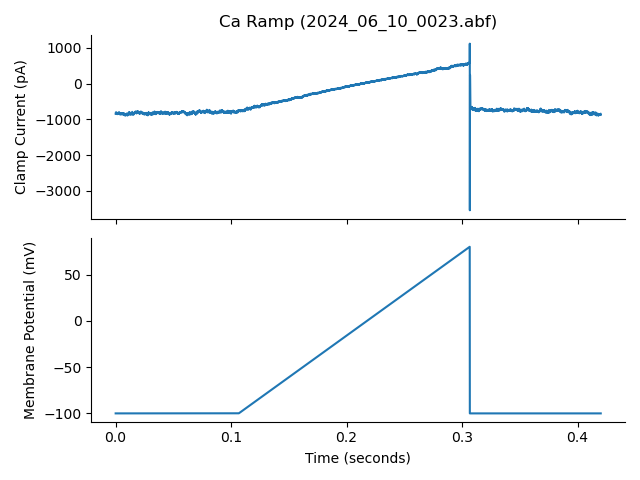

1


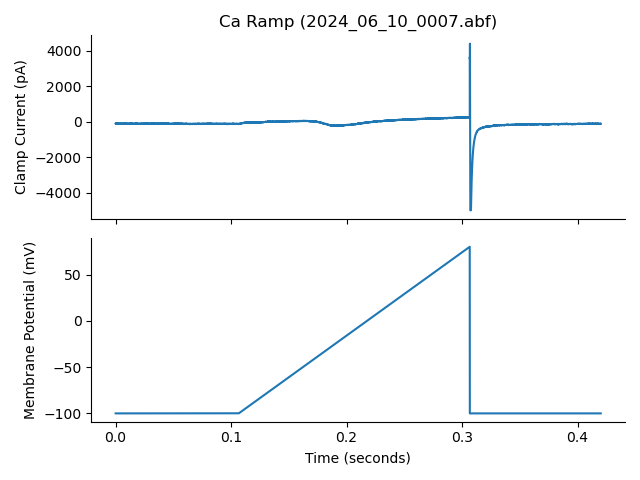

2


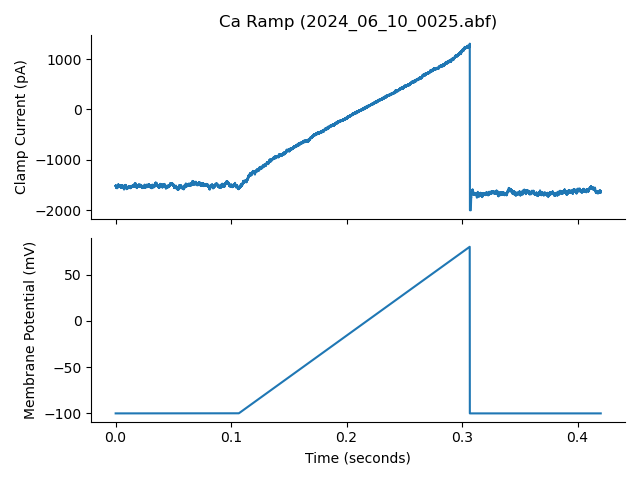

3


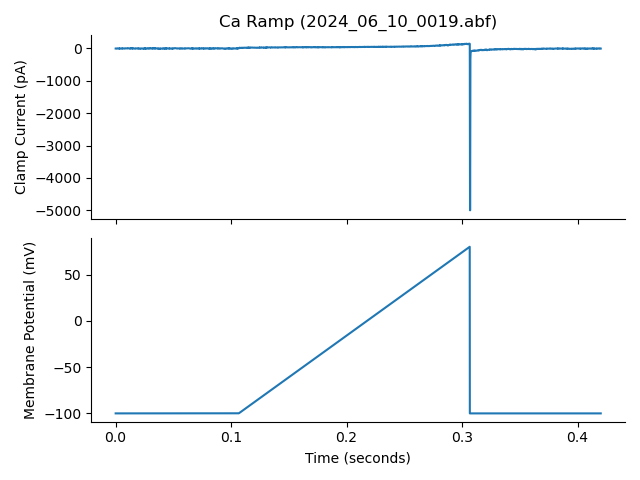

4


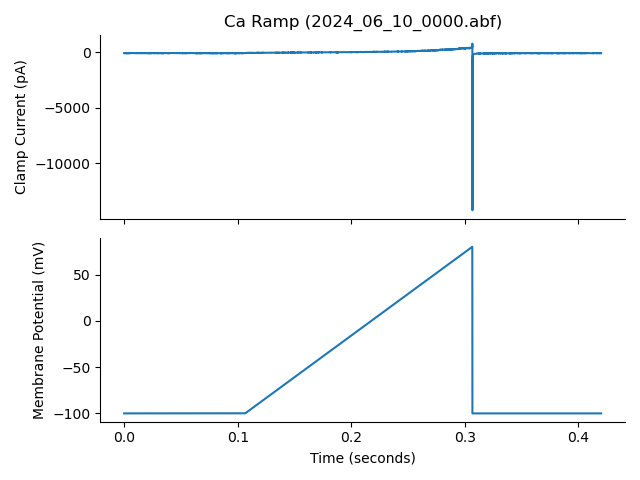

5


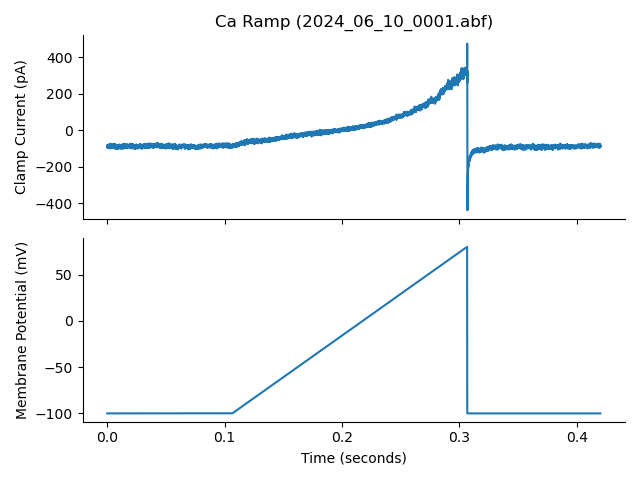

6


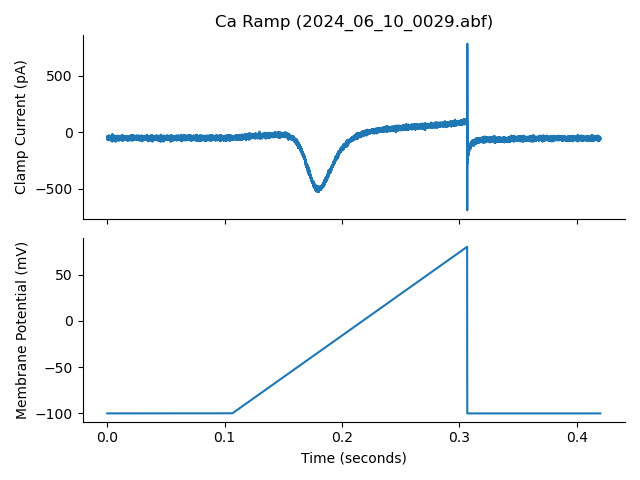

7


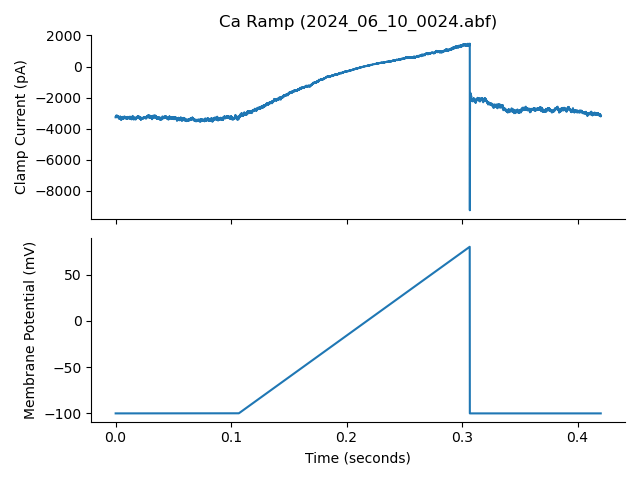

8


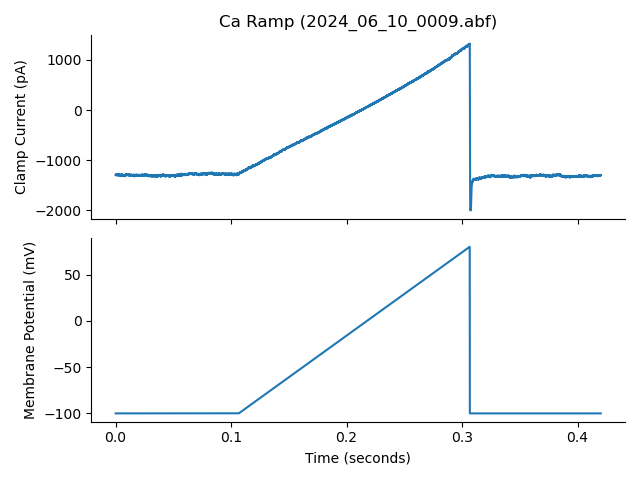

9


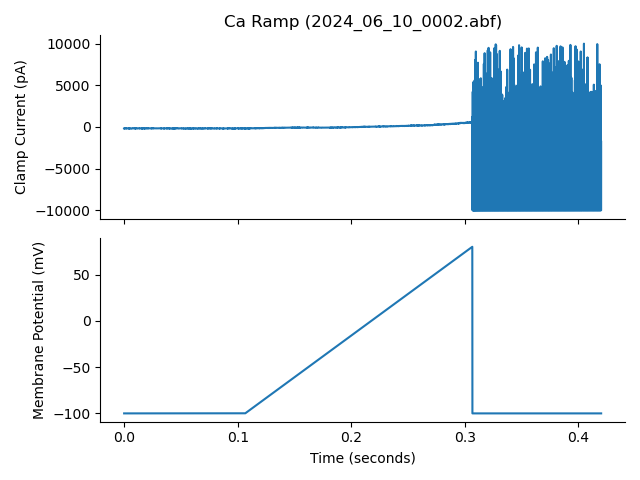

10


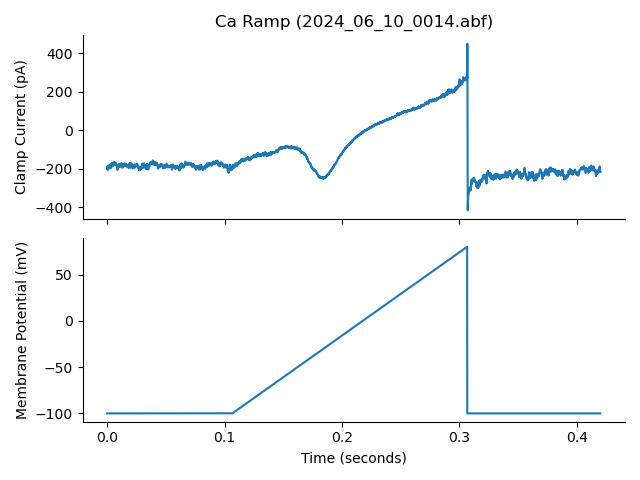

11


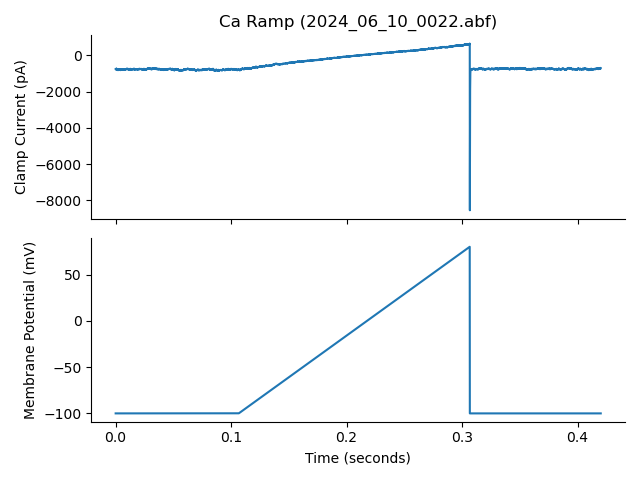

12


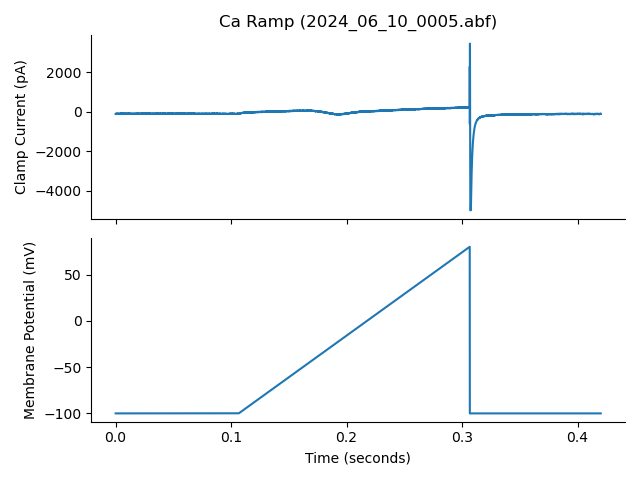

13


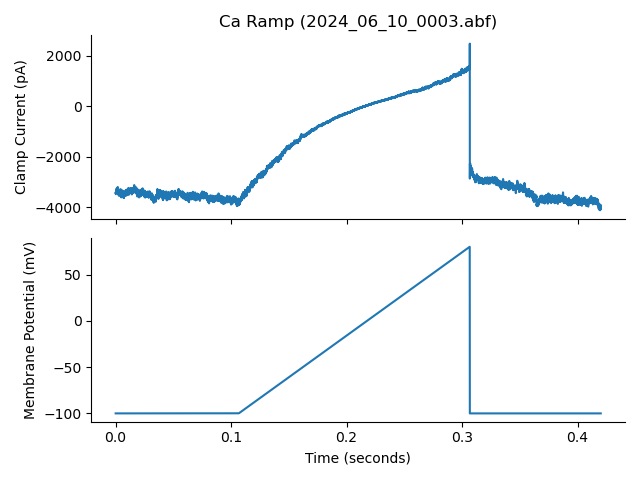

14


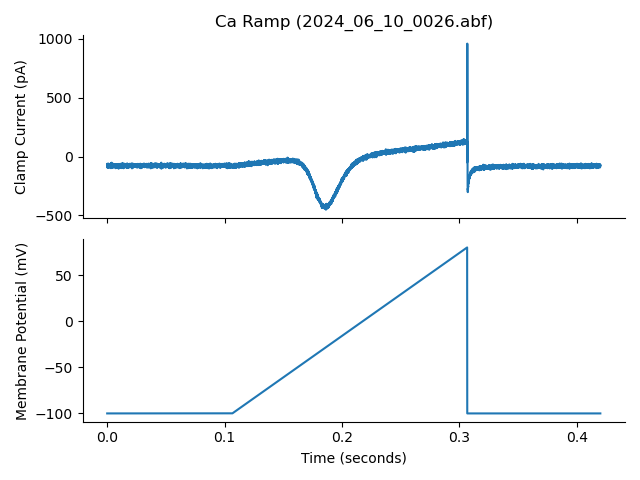

15


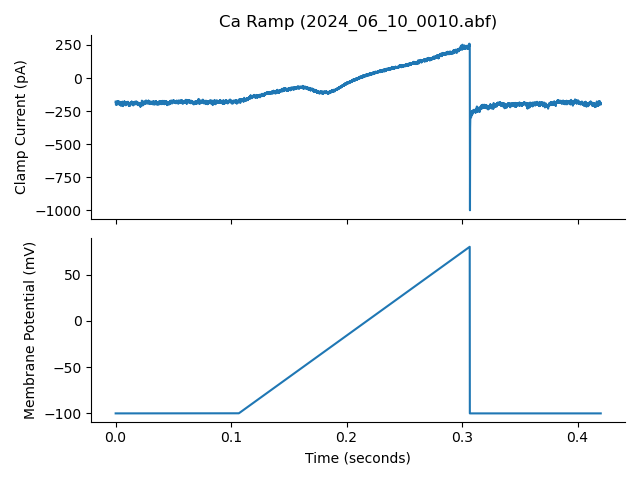

16


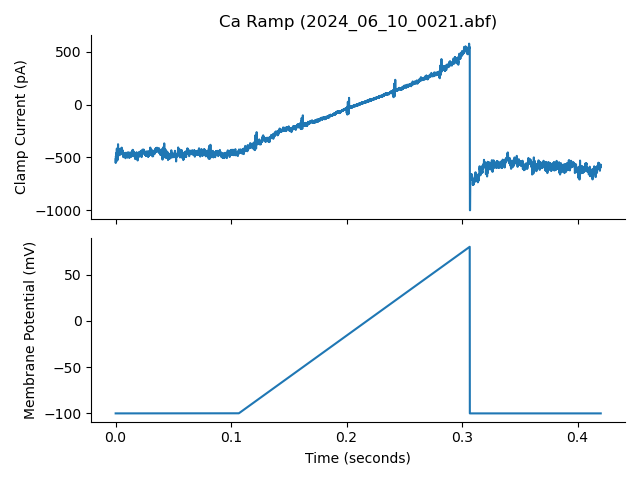

In [6]:
plt.close('all')
## Explore files
for i,f in enumerate(ramp_files):
    print(str(i))
    plot_swps(f)

In [7]:
f = files[14]
swps, swp_time, sr = get_sweeps(f)
## The your voltage :
start = 0.1
end = 0.3
voltage = swp_window(swps,start,end,sr,channel=1)
current = swp_window(swps,start,end,sr,channel=0)
fig,ax = plt.subplots()  
ax.plot(voltage_step,current_response,'o')
ax.set_xlabel('V (mV)')
ax.set_ylabel('I (pA)')
plt.show()

### Activation

In [7]:
IV_files = files_from_protocol('IV',files)
IV_files

['/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0016.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0015.abf']

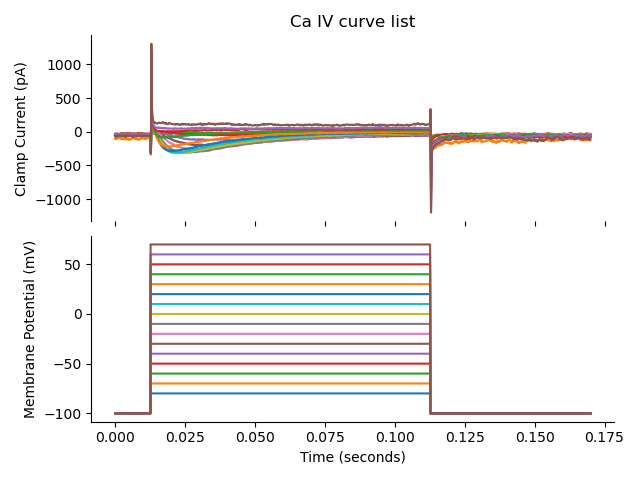

In [8]:
f = IV_files[0]
plot_swps(f)

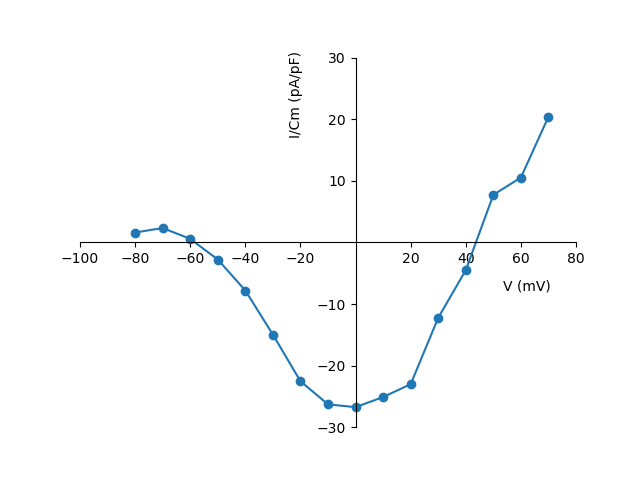

In [25]:
## Extract the sweeps
swps, swp_time, sr = get_sweeps(f)
## Enter the membrane capacitance you have noted
capacitance = 10 # pF
## The mean on your voltage step:
v_start = 0.014
v_end = 0.02
voltage_step = np.mean(swp_window(swps,v_start,v_end,sr,channel=1),axis=1)
## The mean on your voltage step:
v_start = 0.01
v_end = 0.012
current_baseline = np.mean(swp_window(swps,v_start,v_end,sr,channel=0),axis=1)
## the pic response in your current:
i_start = 0.015
i_end = 0.04
current_window = swp_window(swps,i_start,i_end,sr,channel=0)
current_response = np.array([swp[np.argmax(np.abs(swp))] for swp in current_window])
## normalise over baseline
current_response -= current_baseline
## make it density current
current_response /= capacitance
## Create a figure plot with this line:
fig,ax = plt.subplots()
## the ax.plot(x,y,'line, dot,...') will plot your data to the figure
# image_path = '/home/alan/Documents/LAB/CSHL/Airplane.png'  # Path to your airplane image file
# airplane_image = plt.imread(image_path)
# ##
# # Create a custom marker using the airplane image
# def airplane_marker(ax, xdata, ydata, image):
#     for x, y in zip(xdata, ydata):
#         ab = AnnotationBbox(OffsetImage(image, zoom=0.25), (x, y), frameon=False)
#         ax.add_artist(ab)
    
ax.plot(voltage_step,current_response,'-o')
# airplane_marker(ax,voltage_step,current_response, airplane_image)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.set_xlabel('V (mV)')
ax.set_ylabel('I/Cm (pA/pF)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_label_coords(0.9, 0.4) 
ax.yaxis.set_label_coords(0.45, 0.9)  # Move the y label to the center left
# Customize ticks to remove the 0 ticks and labels
xticks = [tick for tick in ax.get_xticks() if tick != 0]
yticks = [tick for tick in ax.get_yticks() if tick != 0]
ax.set_xticks(xticks)
ax.set_yticks(yticks)
plt.show()

### Inactivation

In [21]:
Inac_files = files_from_protocol('Inact',files)
Inac_files

['/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0018.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Cav/2024_06_10_0017.abf']

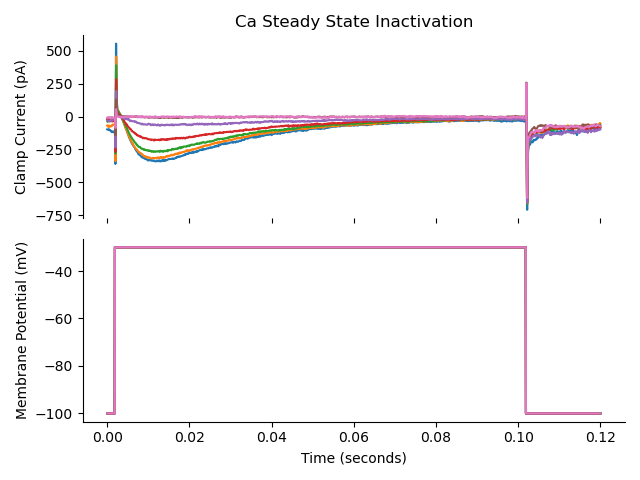

In [28]:
f = Inac_files[1]
plot_swps(f)